In [ ]:
pip install imbalanced-learn

In [ ]:
# Installing the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [ ]:
# Loading the dataset
file_path = "/content/insurance_claims.csv"
df = pd.read_csv(file_path)

In [ ]:
# Checking Basic Info
print("Dataset Info: ")
print(df.info())

Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PolicyholderNumber                10000 non-null  object 
 1   FirstPartyVehicleNumber           10000 non-null  object 
 2   PolicyholderOccupation            10000 non-null  object 
 3   FirstPolicySubscriptionDate       10000 non-null  object 
 4   FirstPartyVehicleType             10000 non-null  object 
 5   PolicyholderPostCode              10000 non-null  int64  
 6   PolicyWasSubscribedOnInternet     10000 non-null  int64  
 7   NumberOfPoliciesOfPolicyholder    10000 non-null  int64  
 8   FpVehicleAgeMonths                10000 non-null  int64  
 9   PolicyHolderAge                   10000 non-null  int64  
 10  FirstPartyLiability               10000 non-null  float64
 11  ReferenceId                       10000 non-null  obj

In [ ]:
# Checking for missing values
print("\nMissing Values: ")
print(df.isnull().sum())


Missing Values: 
PolicyholderNumber                  0
FirstPartyVehicleNumber             0
PolicyholderOccupation              0
FirstPolicySubscriptionDate         0
FirstPartyVehicleType               0
PolicyholderPostCode                0
PolicyWasSubscribedOnInternet       0
NumberOfPoliciesOfPolicyholder      0
FpVehicleAgeMonths                  0
PolicyHolderAge                     0
FirstPartyLiability                 0
ReferenceId                         0
ThirdPartyVehicleNumber             0
InsurerNotes                        0
LossDate                            0
ClaimCause                          0
ClaimInvolvedCovers                 0
DamageImportance                    0
ConnectionBetweenParties            0
LossPostCode                        0
EasinessToStage                     0
ClaimWithoutIdentifiedThirdParty    0
ClaimAmount                         0
LossHour                            0
NumberOfBodilyInjuries              0
Fraud                           

In [ ]:
# Printing Summary Statistics
print("\nSummary Statistics: ")
print(df.describe())


Summary Statistics: 
       PolicyholderPostCode  PolicyWasSubscribedOnInternet  \
count          10000.000000                    10000.00000   
mean           55160.097100                        0.29040   
std            26257.617614                        0.45397   
min            10010.000000                        0.00000   
25%            31798.250000                        0.00000   
50%            55844.000000                        0.00000   
75%            78056.250000                        1.00000   
max            99998.000000                        1.00000   

       NumberOfPoliciesOfPolicyholder  FpVehicleAgeMonths  PolicyHolderAge  \
count                    10000.000000        10000.000000     10000.000000   
mean                         1.596800          120.534600        48.520900   
std                          0.857265           69.264548        17.764237   
min                          1.000000            1.000000        18.000000   
25%                          

<ipython-input-48-79957032b916>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Fraud"], palette="cool")


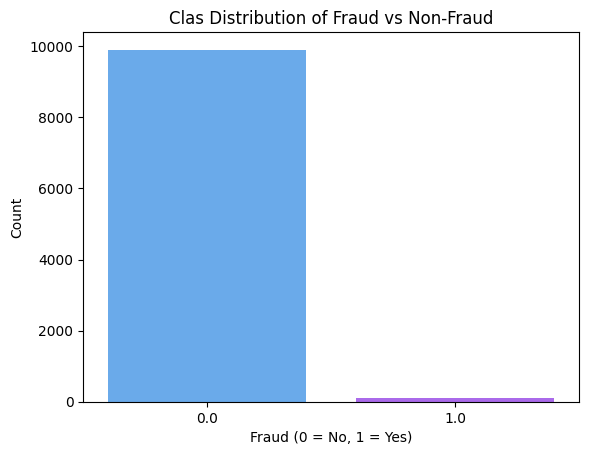

In [ ]:
# Visualising class distribuytion
sns.countplot(x=df["Fraud"], palette="cool")
plt.title("Clas Distribution of Fraud vs Non-Fraud")
plt.xlabel("Fraud (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

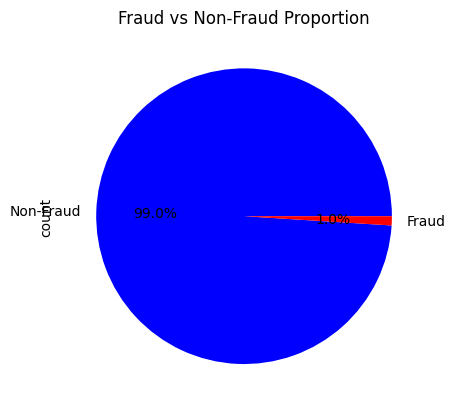

In [ ]:
# visualising through a pie chart for class proportions
df["Fraud"].value_counts().plot.pie(autopct="%1.1f%%", colors=["blue", "red"], labels=["Non-Fraud", "Fraud"])
plt.title("Fraud vs Non-Fraud Proportion")
plt.show()


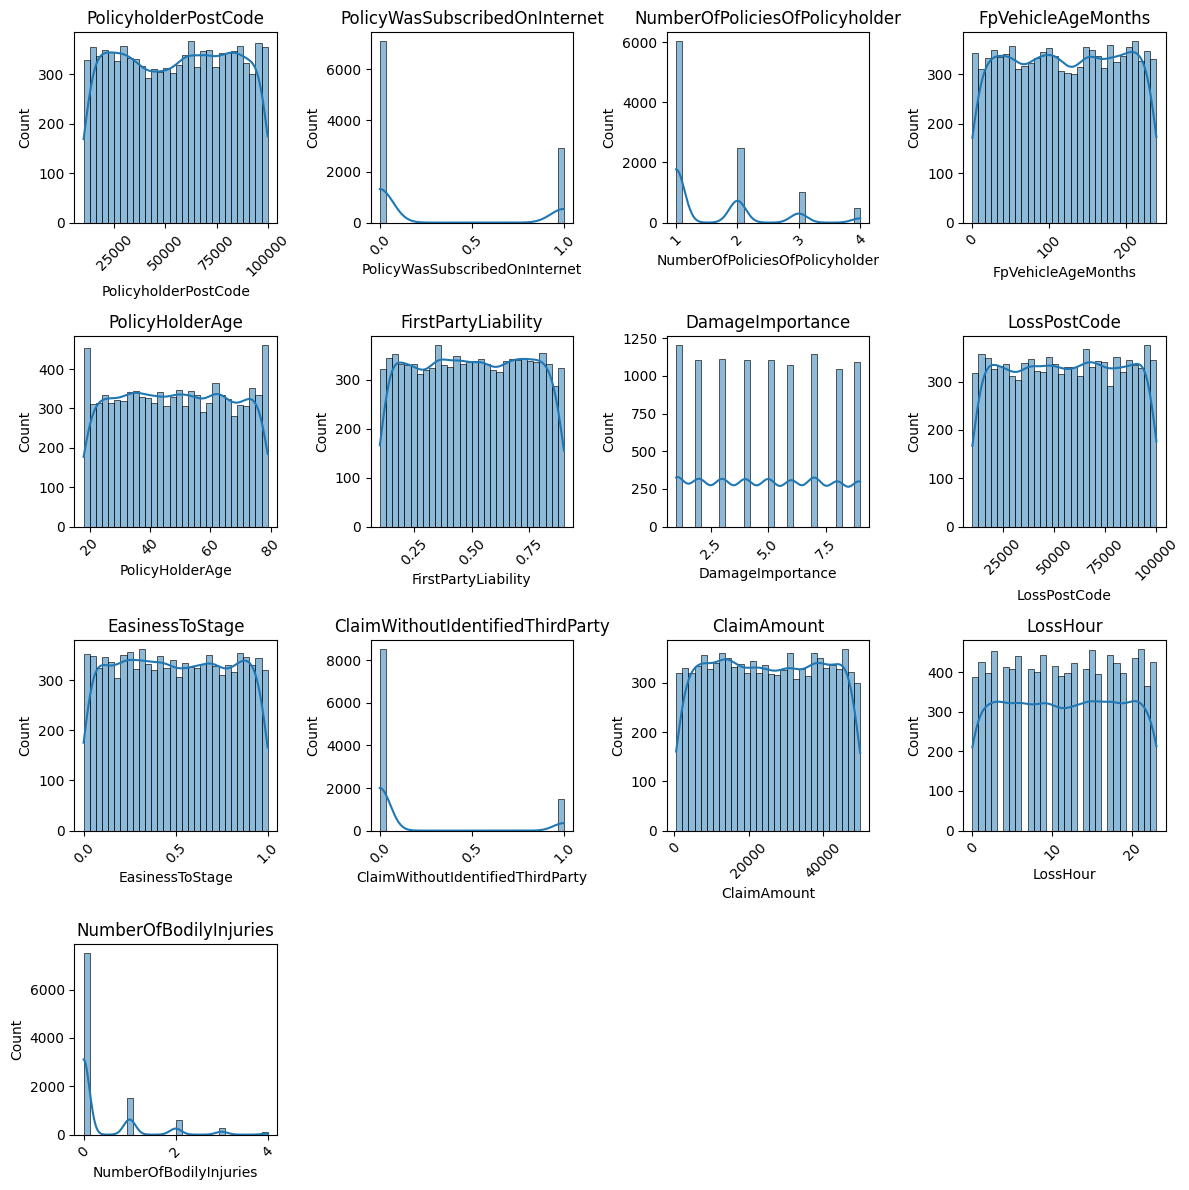

In [ ]:
# Plot feature distributions
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove("Fraud")  # Exclude target variable

num_plots = len(num_cols)
rows = (num_plots // 4) + (num_plots % 4 > 0)  # Adjust rows dynamically
plt.figure(figsize=(12, rows * 3))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 4, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Dropping irrelevant columns
drop_cols = ["PolicyholderNumber", "FirstPartyVehicleNumber", "ReferenceId",
    "ThirdPartyVehicleNumber", "InsurerNotes", "LossDate", "FirstPolicySubscriptionDate"]
df_cleaned = df.drop(columns=drop_cols)

In [ ]:
# Encoding categorical variables
categorical_cols = ["PolicyholderOccupation", "FirstPartyVehicleType", "ClaimCause", "ClaimInvolvedCovers", "ConnectionBetweenParties"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  # Storing Encoders for future

In [ ]:
# Separating features and target variables
X = df_cleaned.drop(columns=["Fraud"])
y = df_cleaned["Fraud"]

In [ ]:
# Standardizing numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Splitting into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 42, stratify = y)


In [ ]:
# Applying SMOTE to balance out the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# Training a logistic regression model
log_reg = LogisticRegression(class_weight = "balanced", random_state = 42)
log_reg.fit(X_train_smote, y_train_smote)

LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
# MAking Predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Printing the evaluation metrics
print("Model Performance Metrics are as follows:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

Model Performance Metrics are as follows:
Accuracy: 0.5695
Precision: 0.0059
Recall: 0.2500
F1 Score: 0.0115
AUC-ROC: 0.4079


# Insights
## Low precision and AUC-ROC
  Class imbalance is still affecting results even after using SMOTE to baalance it out to some effect.
  Poor precision also signifies a higher number of false positives as is evident in the confusion matrix below. 0.59% precision means the model is random guessing the fraud cases.
## Poor Recall
  A recall of 0.25 means that out of all the actual frauds the model only identified 25%. This is better than random guessing but still not useful in identifying frauds.
# Recommendations
  ## Trying a more powerful model which is equipped to handle imbalanced data better than logistic regression models. For Example: Random Forest or XGBoost.

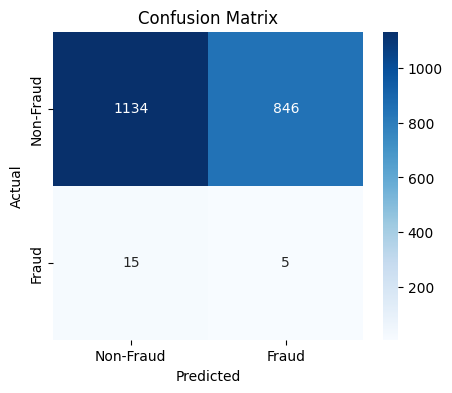

In [ ]:
# Building a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Analysing the confusion Matrix
## False Positives
 Incorrectly classified 846 non-fraudulent claims as fraud. Meaning legitimate claims are being flagged as fraud.

## False Negatives
  Model failed to detect 15 actual fraudulent claims which means these fraudulent activities would go unnoticed.